In [191]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from scipy.optimize import curve_fit
import datetime
from datetime import date, timedelta

In [179]:
with open('../data/BIG_CSV.csv') as f:
    p = pd.read_csv(f)

In [40]:
stop = datetime.date(2021, 4, 16)
start = datetime.date(2020, 1, 21)
ndays = (stop - start).days

In [182]:
p.new_cases[p.location.isin(['Switzerland'])].min()

0.0

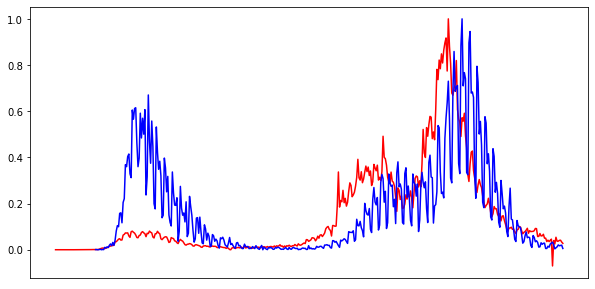

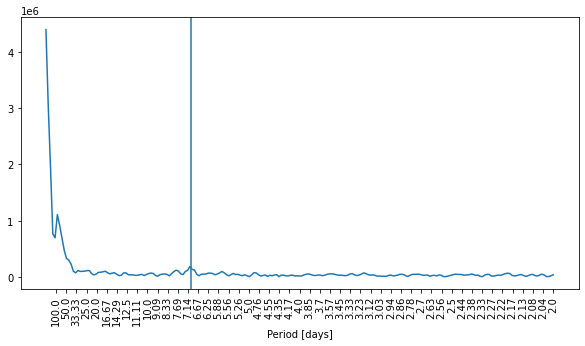

In [43]:
T = p.date[p.location.isin(['United Kingdom']) & p.new_cases.notna()]
X = p.new_cases[p.location.isin(['United Kingdom']) & p.new_cases.notna()]
X2 = p.new_deaths[p.location.isin(['United Kingdom']) & p.new_deaths.notna()]
T2 = p.date[p.location.isin(['United Kingdom']) & p.new_deaths.notna()]
plt.figure(figsize=(10,5))
plt.plot(T,X / max(X), 'r', T2, X2 / max(X2), 'b')
plt.xticks([])
plt.show()
S = np.abs(np.fft.rfft(X))
sc = 1
F = np.fft.rfftfreq(len(X), 1)
plt.figure(figsize=(10,5))
plt.plot(F,S)
xt = np.arange(0.01, 0.51, 0.01)
plt.xticks(xt, np.round(1/xt, 2), rotation=90)
plt.axvline(1/7)
#plt.ylim(0, 50000)
plt.xlabel("Period [days]")
plt.show()

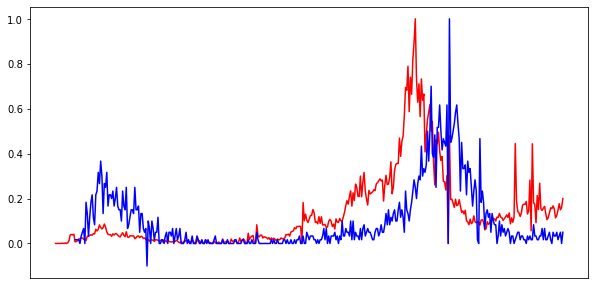

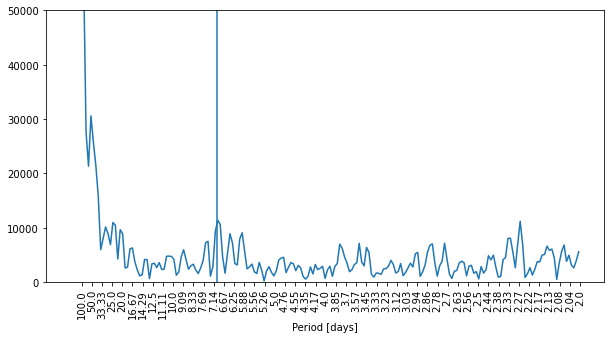

In [52]:
T = p.date[p.location.isin(['Denmark']) & p.new_cases.notna()]
X = p.new_cases[p.location.isin(['Denmark']) & p.new_cases.notna()]
X2 = p.new_deaths[p.location.isin(['Denmark']) & p.new_deaths.notna()]
T2 = p.date[p.location.isin(['Denmark']) & p.new_deaths.notna()]
plt.figure(figsize=(10,5))
plt.plot(T,X / max(X), 'r', T2, X2 / max(X2), 'b')
plt.xticks([])
plt.show()
S = np.abs(np.fft.rfft(X))
sc = 1
F = np.fft.rfftfreq(len(X), 1)
plt.figure(figsize=(10,5))
plt.plot(F,S)
xt = np.arange(0.01, 0.51, 0.01)
plt.xticks(xt, np.round(1/xt, 2), rotation=90)
plt.axvline(1/7)
plt.ylim(0, 50000)
plt.xlabel("Period [days]")
plt.show()

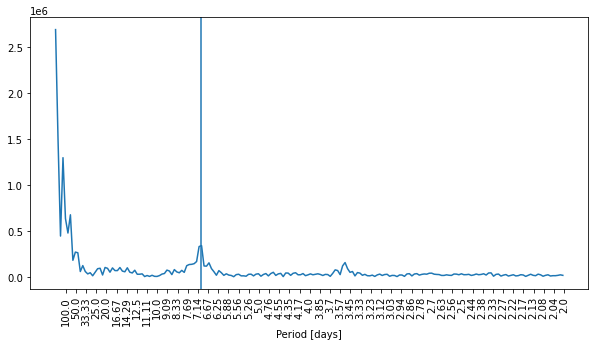

In [55]:
T = p.date[p.location.isin(['Poland']) & p.new_cases.notna()]
X = p.new_cases[p.location.isin(['Poland']) & p.new_cases.notna()]
S = np.abs(np.fft.rfft(X))
F = np.fft.rfftfreq(len(X), 1)
plt.figure(figsize=(10,5))
plt.plot(F,S)
xt = np.arange(0.01, 0.51, 0.01)
plt.xticks(xt, np.round(1/xt, 2), rotation=90)
plt.axvline(1/7)
#plt.ylim(0, 50000)
plt.xlabel("Period [days]")
plt.show()

In [117]:
x = p[p.location.isin(['Denmark'])]
for i in x.columns:
    print(i, len(x[x[i].notna()]))

Unnamed: 0 442
location 442
date 442
total_cases 417
new_cases 417
new_cases_smoothed 412
total_deaths 401
new_deaths 401
new_deaths_smoothed 412
total_cases_per_million 417
new_cases_per_million 417
new_cases_smoothed_per_million 412
total_deaths_per_million 401
new_deaths_per_million 401
new_deaths_smoothed_per_million 412
owid-covid-data_reproduction_rate 403
owid-covid-data_icu_patients 328
owid-covid-data_icu_patients_per_million 328
owid-covid-data_hosp_patients 329
owid-covid-data_hosp_patients_per_million 329
owid-covid-data_weekly_icu_admissions 0
owid-covid-data_weekly_icu_admissions_per_million 0
owid-covid-data_weekly_hosp_admissions 59
owid-covid-data_weekly_hosp_admissions_per_million 59
owid-covid-data_new_tests 421
owid-covid-data_total_tests 421
owid-covid-data_total_tests_per_thousand 421
owid-covid-data_new_tests_per_thousand 421
owid-covid-data_new_tests_smoothed 430
owid-covid-data_new_tests_smoothed_per_thousand 430
owid-covid-data_positive_rate 407
owid-covid-dat

<ipython-input-214-cfd18ae351d3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = p.sort_values(by = 'date')[imp_col][p.location.isin(['Denmark'])]
<ipython-input-214-cfd18ae351d3>:20: RuntimeWarning: invalid value encountered in true_divide
  B /= np.linalg.norm(B)
<ipython-input-214-cfd18ae351d3>:19: RuntimeWarning: invalid value encountered in true_divide
  A /= np.linalg.norm(A)


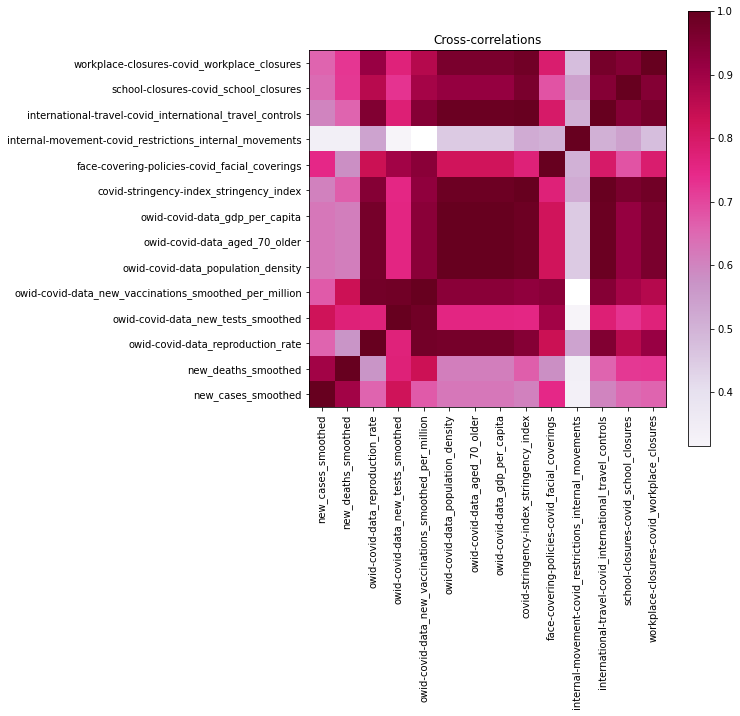

80

In [214]:
imp_col = ['new_cases_smoothed', 'new_deaths_smoothed', 'owid-covid-data_reproduction_rate',
           'owid-covid-data_new_tests_smoothed', 'owid-covid-data_new_vaccinations_smoothed_per_million', 'owid-covid-data_population_density', 'owid-covid-data_aged_70_older',
           'owid-covid-data_gdp_per_capita', 'covid-stringency-index_stringency_index', 'face-covering-policies-covid_facial_coverings',
           'internal-movement-covid_restrictions_internal_movements', 'international-travel-covid_international_travel_controls',
           'school-closures-covid_school_closures', 'workplace-closures-covid_workplace_closures']
x = p.sort_values(by = 'date')[imp_col][p.location.isin(['Denmark'])]
X = np.array(x, dtype = float)[40 : -10]
C = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        A = X[:, i].copy()
        B = X[:, j].copy()
        
        IDX = (~np.isnan(A)) * (~np.isnan(B))
        
        A = A[IDX]
        B = B[IDX]
        
        A /= np.linalg.norm(A)
        B /= np.linalg.norm(B)
        #print(A.shape, B.shape, i, j)
        C[i, j] = np.max(ss.correlate(A, B, mode='same'))
        
plt.figure(figsize=(8,8))
plt.imshow(C, cmap='PuRd', origin='lower')
plt.yticks(np.arange(0, len(imp_col)), imp_col)
plt.xticks(np.arange(0, len(imp_col)), imp_col, rotation=90)
plt.colorbar()
plt.title('Cross-correlations')
plt.show()

len(x[x['internal-movement-covid_restrictions_internal_movements'].isin([1])])

In [221]:
'''
S - susceptible individuals
I - individuals suffering from a disease and spreading the infection
R – recovered
N - population of Denmark
'''

def Dr(R, a, r): 
    return a * (N - R - S0 * exp(-R * r / a))

def get_idx(date):
    date = date.strftime("%Y-%m-%d")
    return T.index[T.isin([date])]

def get_date(idx):
    date = np.array(T[idx].split('-'), dtype='int')
    date = date(date[0], date[1], date[2])
    
N = 5.806 * 10 ** 6
S0 = N
D = p.new_deaths[p.location.isin(['Denmark']) & p.new_cases.notna()]
T = p.date[p.location.isin(['Denmark']) & p.new_cases.notna()]
X = p.new_cases[p.location.isin(['Denmark']) & p.new_cases.notna()]
H = np.zeros((len(X) - 14))
IDX = T.index
dt = 14
idx_start_date = get_idx(start_date)
for i in range(len(X) - dt):
    
    
R = D + X
popt, pcov = curve_fit(Dr, T, X)'''

478    2020-02-27
Name: date, dtype: object 2020-02-27


'for i in range(dt, len(X)):\n    \n    \nR = D + X\npopt, pcov = curve_fit(Dr, T, X)'

In [195]:
d = date(2021,2,3)

print((d + timedelta(days=-14)).strftime("%Y-%m-%d"))

2021-01-20


In [217]:
T

478    2020-02-27
479    2020-02-28
480    2020-02-29
481    2020-03-01
482    2020-03-02
          ...    
890    2021-04-14
891    2021-04-15
892    2021-04-16
893    2021-04-17
894    2021-04-18
Name: date, Length: 417, dtype: object

In [201]:
X

478      1.0
479      0.0
480      2.0
481      1.0
482      0.0
       ...  
890    664.0
891    798.0
892    677.0
893    724.0
894    902.0
Name: new_cases, Length: 417, dtype: float64